In [67]:
import numpy as np
import pandas as pd
import mglearn
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [68]:
cancer = load_breast_cancer()

print(cancer.keys())
print(cancer["DESCR"][:1000])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were c

In [69]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

cancer_X_dataframe = pd.DataFrame(X_train, columns=cancer.feature_names)
cancer_X_dataframe.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.87         20.70           89.77      584.8          0.09578   
1        17.57         15.05          115.00      955.1          0.09847   
2        13.30         21.57           85.24      546.1          0.08582   
3        10.48         19.86           66.72      337.7          0.10700   
4        11.94         20.76           77.87      441.0          0.08605   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.10180         0.03688              0.02369         0.1620   
1           0.11570         0.09875              0.07953         0.1739   
2           0.06373         0.03344              0.02424         0.1815   
3           0.05971         0.04831              0.03070         0.1737   
4           0.10110         0.06574              0.03791         0.1588   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.06688  ...         15.05          24.75            99.17   
1                 0.06149  ...         20.01          19.52           134.90   
2                 0.05696  ...         14.20          29.20            92.94   
3                 0.06440  ...         11.48          29.46            73.68   
4                 0.06766  ...         13.24          27.29            92.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0       688.6            0.1264             0.2037           0.1377   
1      1227.0            0.1255             0.2812           0.2489   
2       621.2            0.1140             0.1667           0.1212   
3       402.8            0.1515             0.1026           0.1181   
4       546.1            0.1116             0.2813           0.2365   

   worst concave points  worst symmetry  worst fractal dimension  
0               0.06845          0.2249                  0.08492  
1               0.14560          0.2756                  0.07919  
2               0.05614          0.2637                  0.06658  
3               0.06736          0.2883                  0.07748  
4               0.11550          0.2465                  0.09981  

[5 rows x 30 columns]

In [70]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print(f"Score of train data: {clf.score(X_train, y_train)}")
print(f"Score of test data: {clf.score(X_test, y_test)}")

Score of train data: 0.9577464788732394
Score of test data: 0.9230769230769231


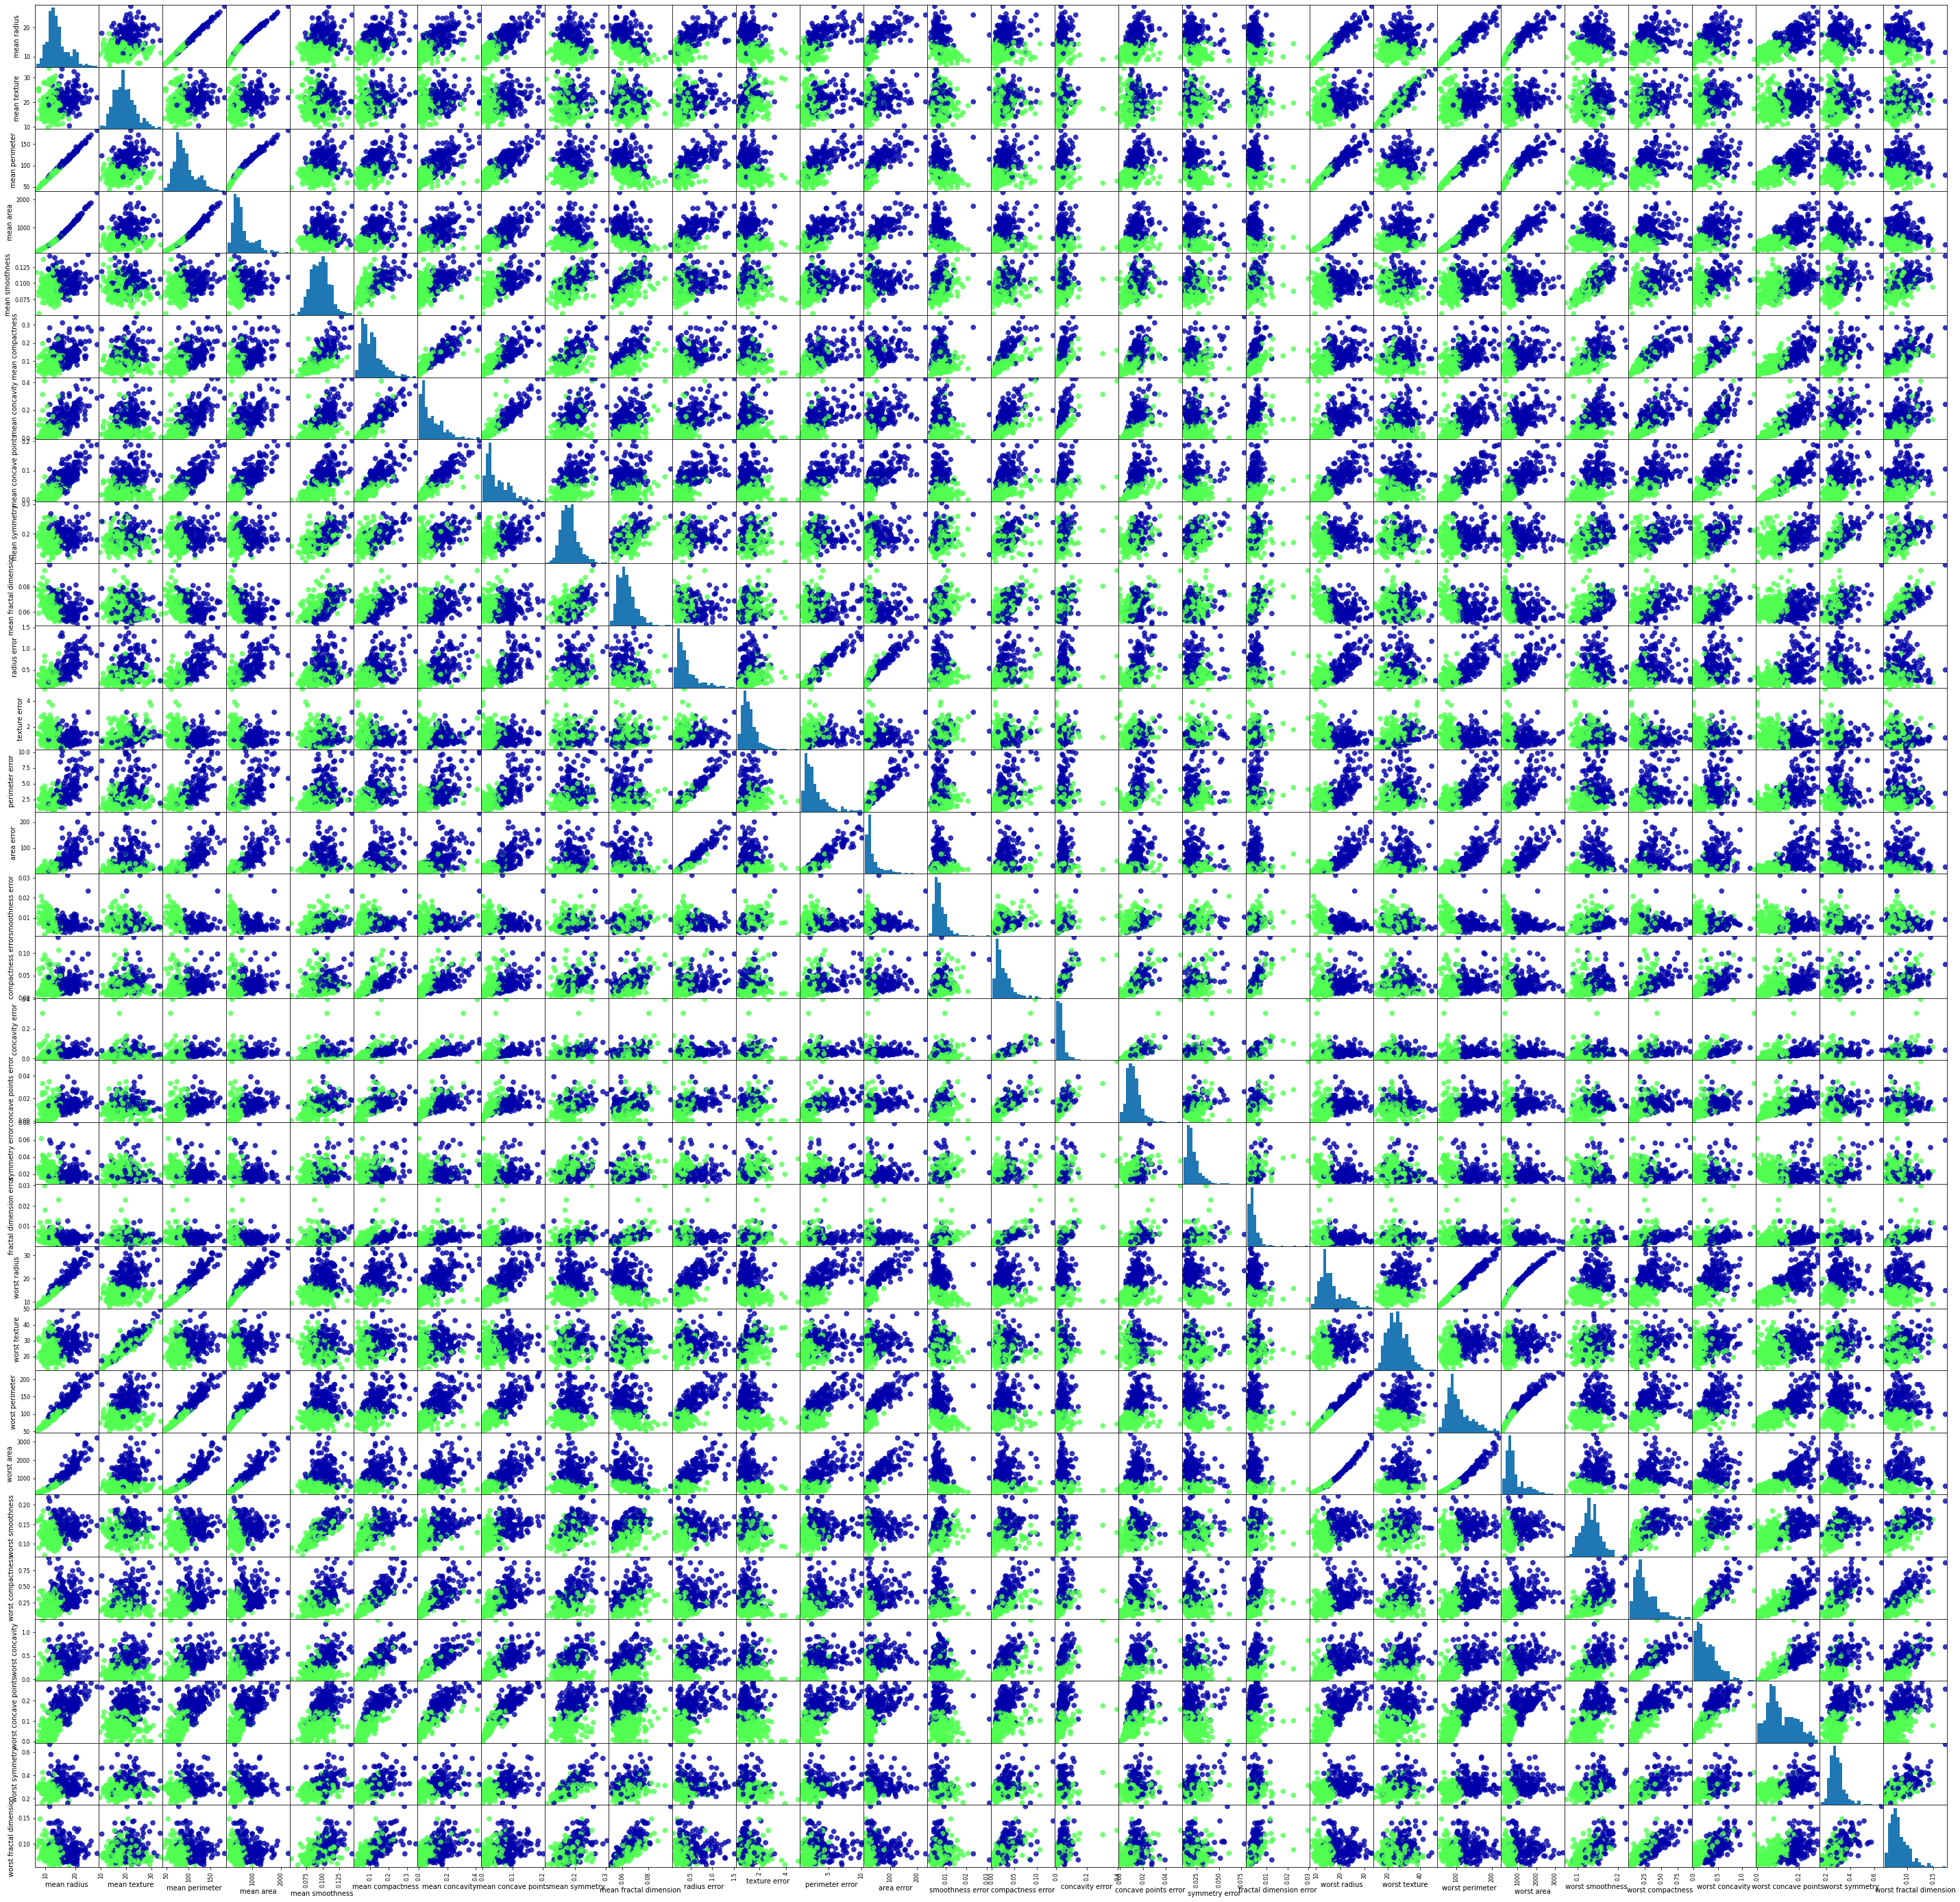

In [65]:
ggr = pd.plotting.scatter_matrix(cancer_X_dataframe, c=y_train, figsize=(50,50), marker='o', hist_kwds={'bins': 20}, s=60, alpha=0.8, cmap=mglearn.cm3)

In [145]:
import random
X_new = cancer_X_dataframe.iloc[[random.randint(0,400)]]
predict = clf.predict(X_new)
print(f"Type of cancer: {cancer.target_names[predict]}")

Type of cancer: ['benign']
